$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N° 1 | Grupo 1}$$


Integrantes:
* Marco Aurelio Ramiro Lagones López
* Luis Eduardo Salazar Aguilar

# Carga de dataset y librerias

1) Carga las librerias que consideres pertinentes (matplotlib, sklearn, etc); posterior a eso carga el archivo heart.csv

In [37]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

df_cancer = pd.read_csv("cancer_challenge_cl2.csv")
df_cancer.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,-1001.00,0.12,0.28,0.30,0.15,0.24,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0
1,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0
2,2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0
3,3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0
4,4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0


# Análisis Exploratorio

2)Ingresa a la referencia citada y menciona las características (columnas) del dataset; haz un analisis exploratorio de la data, mencionando datos estadisticos que consideres a tu criterio.

La base de datos posee 32 columnas de los que, de acuerdo con Wolberg [1995], los datos relevantes son:

* Las columnas "Unnamed:0" y "target" brindan información del atributo, donde "Unnamed:0" hace referencia al identificador del paciente, mientras que "target" muestra el diagnóstico del cáncer del paciente. Para el análisis de los datos, la columna de interés y que se considerará en adelante es "target", donde 1 y 0 representan tumor  benigno y maligno respectivamente. Cabe recalcar del total de muestras (569).
* Existen 10 columnas con  características de valor real para cada núcleo celular, estas son:
 - Mean radius: Es el radio, definida como la media de las distancias desde el centro a los puntos del perímetro.
 - Mean texture: Es la textura, definida como la desviación estándar de los valores de la escala de grises.
 - Mean perimeter: Es el perímetro.
 - Mean area: Es el área.
 - Mean smoothness: Es la suavidad, definida como la variación local en las longitudes de los radios.
 - Mean compactness: Es la compacidad, definida como el perímetro^2 / área - 1,0.
 - Mean concavity: Es la concavidad, definida como la severidad de las porciones cóncavas del contorno.
 - Mean concave points: Son los puntos cóncavos, definidos como el número de porciones cóncavas del contorno.
 - Mean symetry: Es la simetría.
 - Mean fractal dimension: Es la dimensión fractal, definido como la aproximación a la línea costera - 1.

 Para los alcances de este Challenge, se trabajarán con las 11 columnas descritas previamente.

In [38]:
#Se crea una copia de los datos de interes en el dataframe df_cancer_red
df_cancer_red = df_cancer[['mean radius', 'mean texture','mean perimeter','mean area','mean smoothness','mean compactness',
                           'mean concavity','mean concave points','mean symmetry','mean fractal dimension','target']].copy()

In [39]:
# Se mostrará la información del dataframe de interés
print(df_cancer_red.info())
df_cancer_red.describe()


top = df_cancer.columns.tolist()
top.pop() # Eliminamos el último elemento
print(titles)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             569 non-null    float64
 1   mean texture            569 non-null    float64
 2   mean perimeter          569 non-null    float64
 3   mean area               569 non-null    float64
 4   mean smoothness         569 non-null    float64
 5   mean compactness        569 non-null    float64
 6   mean concavity          569 non-null    float64
 7   mean concave points     569 non-null    float64
 8   mean symmetry           566 non-null    float64
 9   mean fractal dimension  569 non-null    float64
 10  target                  569 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 49.0 KB
None
['Unnamed: 0', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave p

A partir de la información previamente mostrada se nota que:
* En la columna "mean radius" existen 2 datos nulos y datos muy fuera del rango esperado como 666.
* En la columna "mean texture" no existen datos nulos, pero se notan valores muy fuera de los rangos como lo es el 99.
* En la columna "mean perimeter" existen 5 datos nulos.
* En la columna "mean area" no existen datos nulos, sin embargo, se identifican datos anómalos como el área negativa -1001 o áreas muy grandes como 2501.
* En la columna "mean smoothness" no existen datos nulos, pero se identifican datos muy fuera del rango normal como lo es 45.
* En la columna "mean compactness" no existen datos nulos.
* En la columna "mean concavity" no existen datos nulos.
* En la columna "mean concave points" existen 7 datos nulos y la presencia de datos muy fuera del rango normal como lo es el 80.
* En la columna "mean symmetry" existen 3 datos nulos y datos muy fuera del rango normal como lo es el 34.
* En la columna "mean fractal dimension" existen 8 datos nulos y datos muy fuera del rango normal como 45.
* En la columna "target" existen 6 datos nulos además existe la presencia de datos fuera la clasificación 0 y 1, un ejemplo de esto es el valor 5.


3) Evalua si la data esta balanceada para el target propuesto. Comenta tus resultados

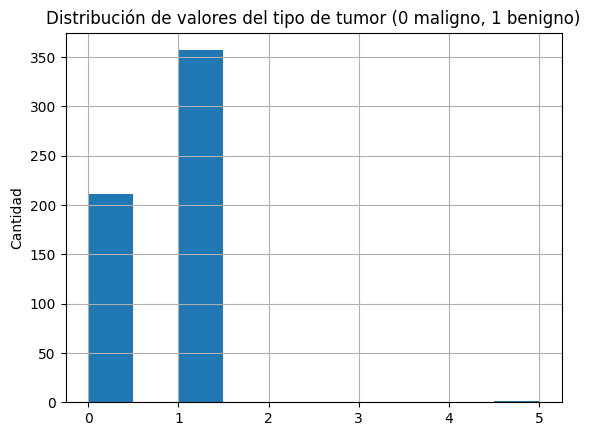

In [40]:
plt.hist(df_cancer_red['target'])
plt.title(('Distribución de valores del tipo de tumor (0 maligno, 1 benigno)'))
plt.grid()
plt.ylabel("Cantidad")
plt.show()

A partir del gráfico anterior, se aprecian datos medianamente igual distribuidos con una diferencia aproximada de 140 muestras entre diagnóstico de tumor benigno frente al maligno. Además se identifica la presencia de valores anómalos como lo es el 5.

# Visualización de la data

4) Muestra con gráficos lo siguiente: \\

*  Distribución de las variable
*  Relación entre las variables
*  Outliers en las variables

Adicional a esto, añadir un gráfico que consideres pertinente para el análisis.

###Distribución de las variables

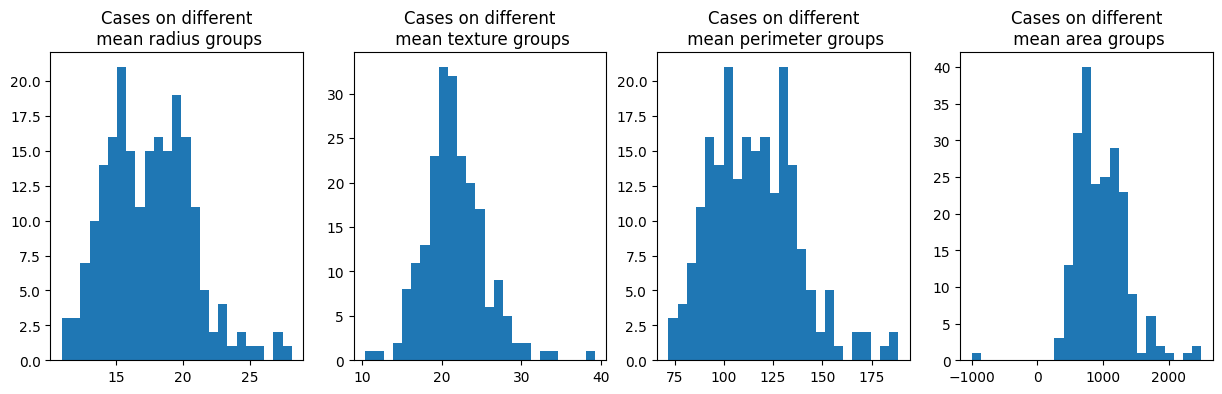

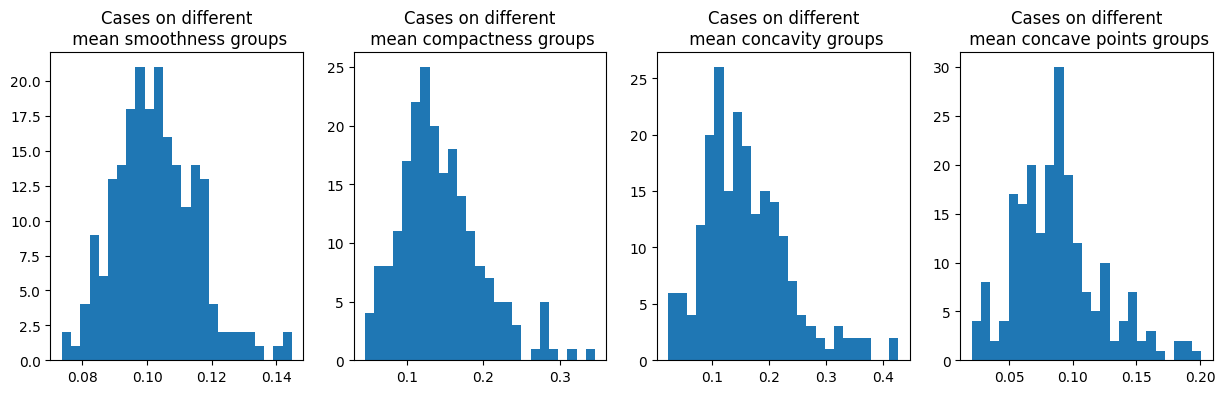

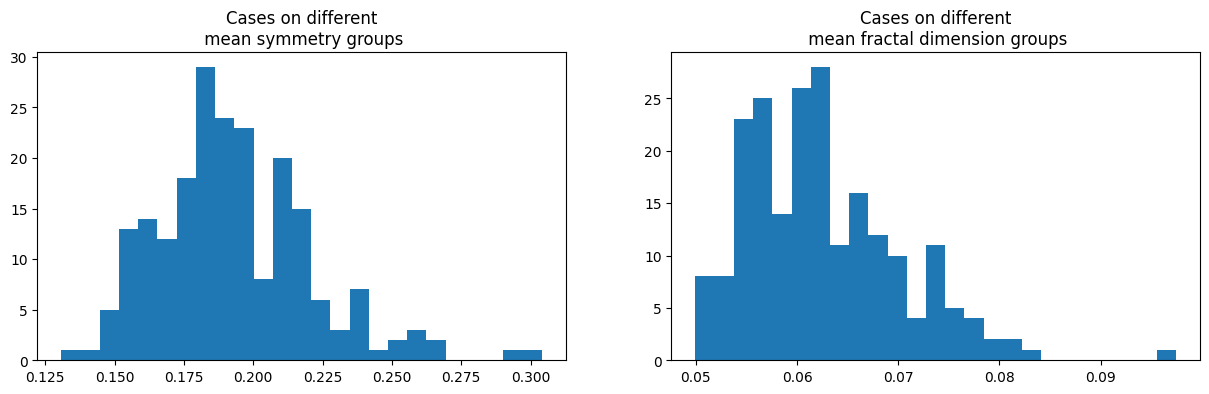

In [41]:
patients = df_cancer_red[df_cancer_red['target'] == 0]

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
fig2, axs2 = plt.subplots(1, 4, figsize=(15, 4))
fig3, axs3 = plt.subplots(1, 2, figsize=(15, 4))

count = 0
for feature in ['mean radius', 'mean texture','mean perimeter','mean area']:
    axs[count].hist(patients[feature], bins=25)
    axs[count].set_title(('Cases on different\n ' +  feature + ' groups'))
    count += 1

count = 0
for feature in ['mean smoothness','mean compactness','mean concavity','mean concave points']:
    axs2[count].hist(patients[feature], bins=25)
    axs2[count].set_title(('Cases on different\n ' +  feature + ' groups'))
    count += 1
count = 0
for feature in ['mean symmetry','mean fractal dimension']:
    axs3[count].hist(patients[feature], bins=25)
    axs3[count].set_title(('Cases on different\n ' +  feature + ' groups'))
    count += 1
plt.show()

### Relación entre variables

<Axes: >

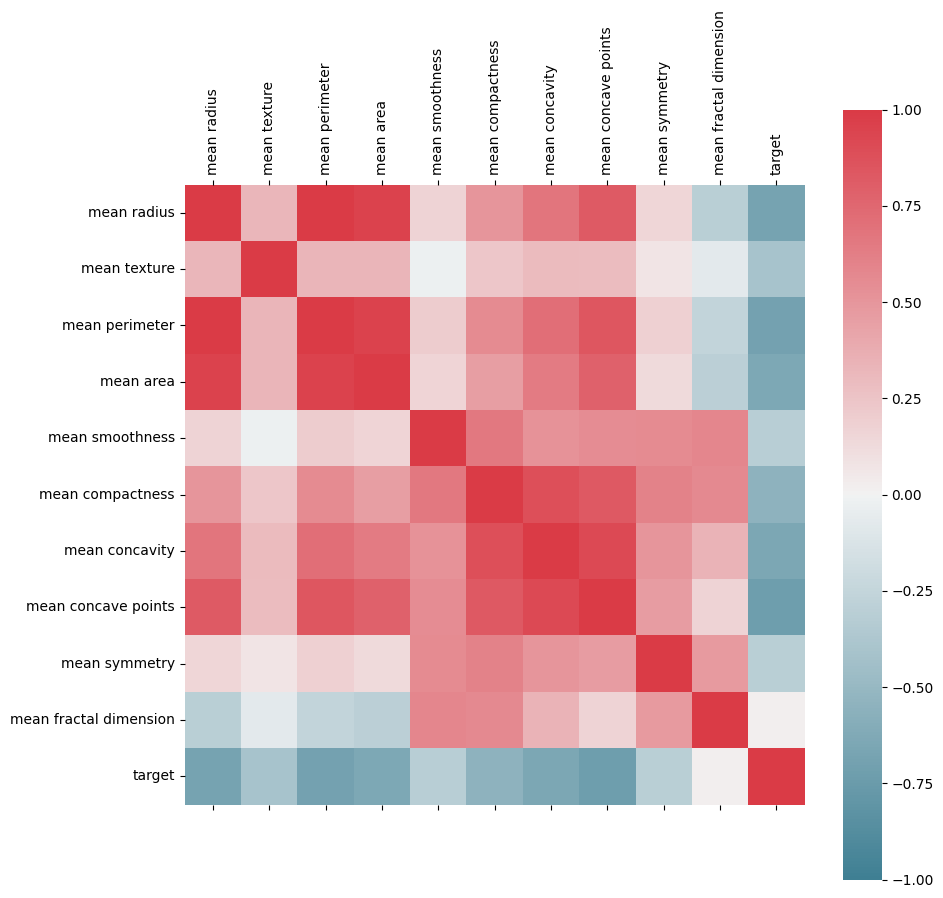

In [42]:
corr = df_cancer_red.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

###Outliers en las variables

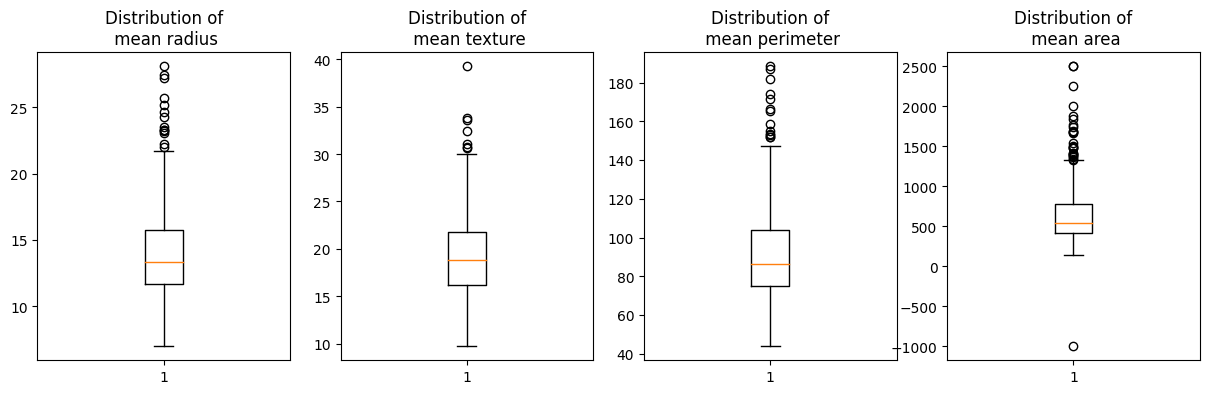

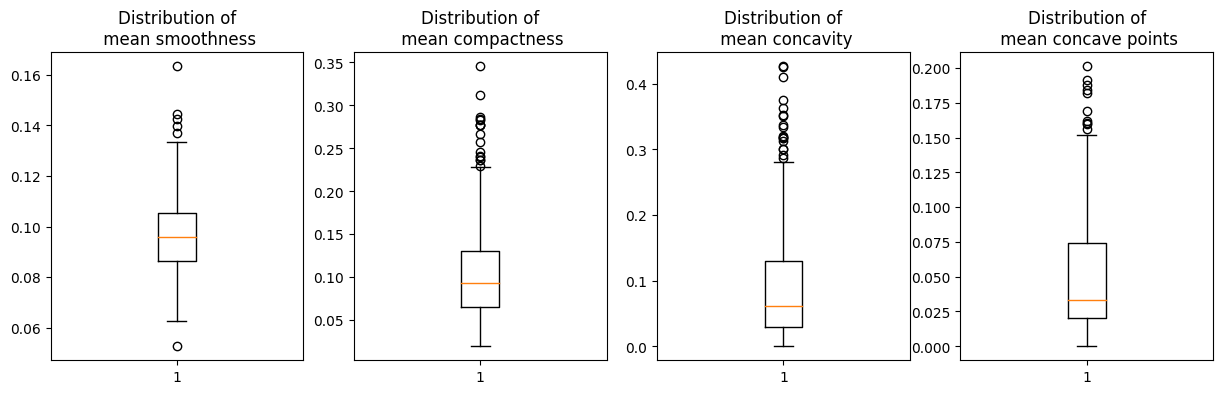

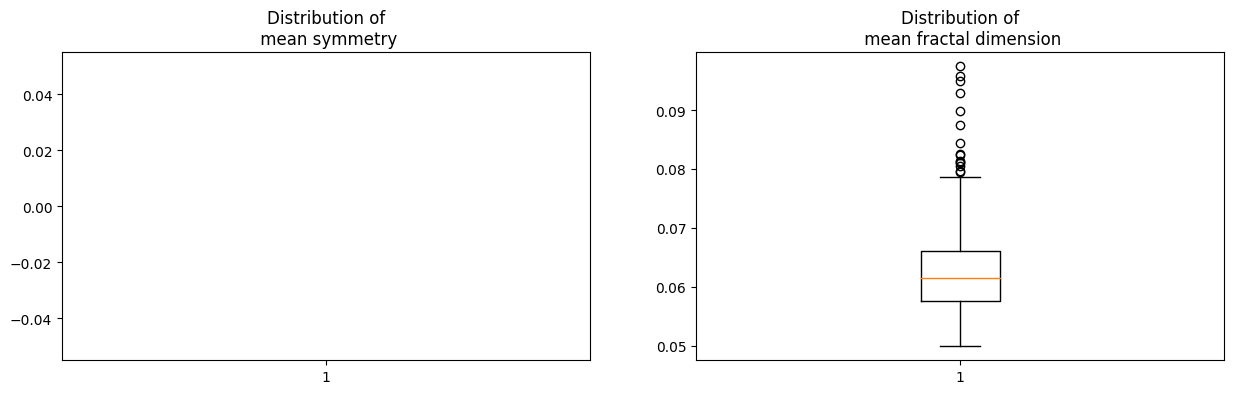

In [43]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
fig2, axs2 = plt.subplots(1, 4, figsize=(15, 4))
fig3, axs3 = plt.subplots(1, 2, figsize=(15, 4))

count = 0
for feature in ['mean radius', 'mean texture','mean perimeter','mean area']:
    axs[count].boxplot(df_cancer_red[feature])
    axs[count].set_title(('Distribution of\n ' + feature))
    count += 1

count = 0
for feature in ['mean smoothness','mean compactness','mean concavity','mean concave points']:
    axs2[count].boxplot(df_cancer_red[feature])
    axs2[count].set_title(('Distribution of\n ' +  feature))
    count += 1

count = 0
for feature in ['mean symmetry','mean fractal dimension']:
    axs3[count].boxplot(df_cancer_red[feature])
    axs3[count].set_title(('Distribution of\n ' +  feature))
    count += 1
plt.show()

# Pre-procesamiento

5) Haz el análisis exploratorio de la data (graficos, análisis de rangos y datos extremos). Comenta en base a las gráficas que datos no son viables clinicamente.

Como puede observarse en los gráficos, la existencia de valores atípicos o irracionales distorsiona completamente algunos gráficos. Por ejemplo, un valor excesivamente alto en el histograma hace que los demás valores se concentren en la esquina superior izquierda del gráfico, lo que les impide ofrecer información detallada debido a la escala. De forma similar, los valores atípicos en el gráfico de cajas y bigotes están tan alejados de la caja que en ciertos casos es imposible crear el gráfico. Por último, pero no por ello menos importante, los valores atípicos del gráfico de la viola provocan un estiramiento hacia la parte superior, lo que hace que la parte más densa de la viola aparezca aplanada hasta casi una línea y represente de forma inexacta los demás valores.
A partir de un análisis gráfico del gráfico de cada variable, se pudo determinar que los problemas mencionados anteriormente son más frecuentes en los siguientes parámetros: radio medio, textura media, suavidad media, puntos cóncavos medios, simetría media, dimensión fractal media, error de perímetro, error de área, error de concavidad, error de simetría, error de puntos cóncavos, error de dimensión fractal, peor perímetro, peor textura, peor compacidad, peor po cóncavo

Tras una revisión de cada variable en el archivo original, se descubrieron algunas irregularidades en los valores, que podrían dar lugar a errores de medición o calibración por desviarse demasiado de la norma. En consecuencia, se considerarían clínicamente inviables.

6) Ejecuta la limpieza de datos según el criterio analizado previamente. Evalua la cantidad de datos crudos vs la cantidad de datos que quedan posterior a la limpieza.

In [45]:
print('Data size before cleaning: ', len(df_cancer_red))
df_cancer_clean = df_cancer[(df_cancer['mean radius'] < 30) & (df_cancer['mean texture'] < 40) & (df_cancer['mean smoothness'] < 1) &
                 (df_cancer['mean concave points'] < 0.3) & (df_cancer['mean symmetry'] < 0.4) & (df_cancer['mean fractal dimension'] < 1) & (df_cancer['perimeter error'] < 12) &
                 (df_cancer['area error'] < 240) & (df_cancer['concavity error'] < 0.12) & (df_cancer['symmetry error'] < 0.06) & (df_cancer['fractal dimension error'] < 0.015) &
                 (df_cancer['worst perimeter'] < 130) & (df_cancer['worst compactness'] < 1.1) & (df_cancer['worst concave points'] < 0.3) & (df_cancer['worst fractal dimension'] < 0.15)]
df_cancer_clean = df_cancer_clean.dropna() # Para eliminar las filas sin datos (null)
print('Data size after cleaning: ', len(df_cancer_clean))

Data size before cleaning:  569
Data size after cleaning:  432


In [46]:
# Comprobamos la eliminación de valores nulos
print(df_cancer_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 5 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               432 non-null    int64  
 1   mean radius              432 non-null    float64
 2   mean texture             432 non-null    float64
 3   mean perimeter           432 non-null    float64
 4   mean area                432 non-null    float64
 5   mean smoothness          432 non-null    float64
 6   mean compactness         432 non-null    float64
 7   mean concavity           432 non-null    float64
 8   mean concave points      432 non-null    float64
 9   mean symmetry            432 non-null    float64
 10  mean fractal dimension   432 non-null    float64
 11  radius error             432 non-null    float64
 12  texture error            432 non-null    float64
 13  perimeter error          432 non-null    float64
 14  area error               4

7) Vuelve a utilizar gráficas para evaluar los datos limpios. Comenta tus resultados.

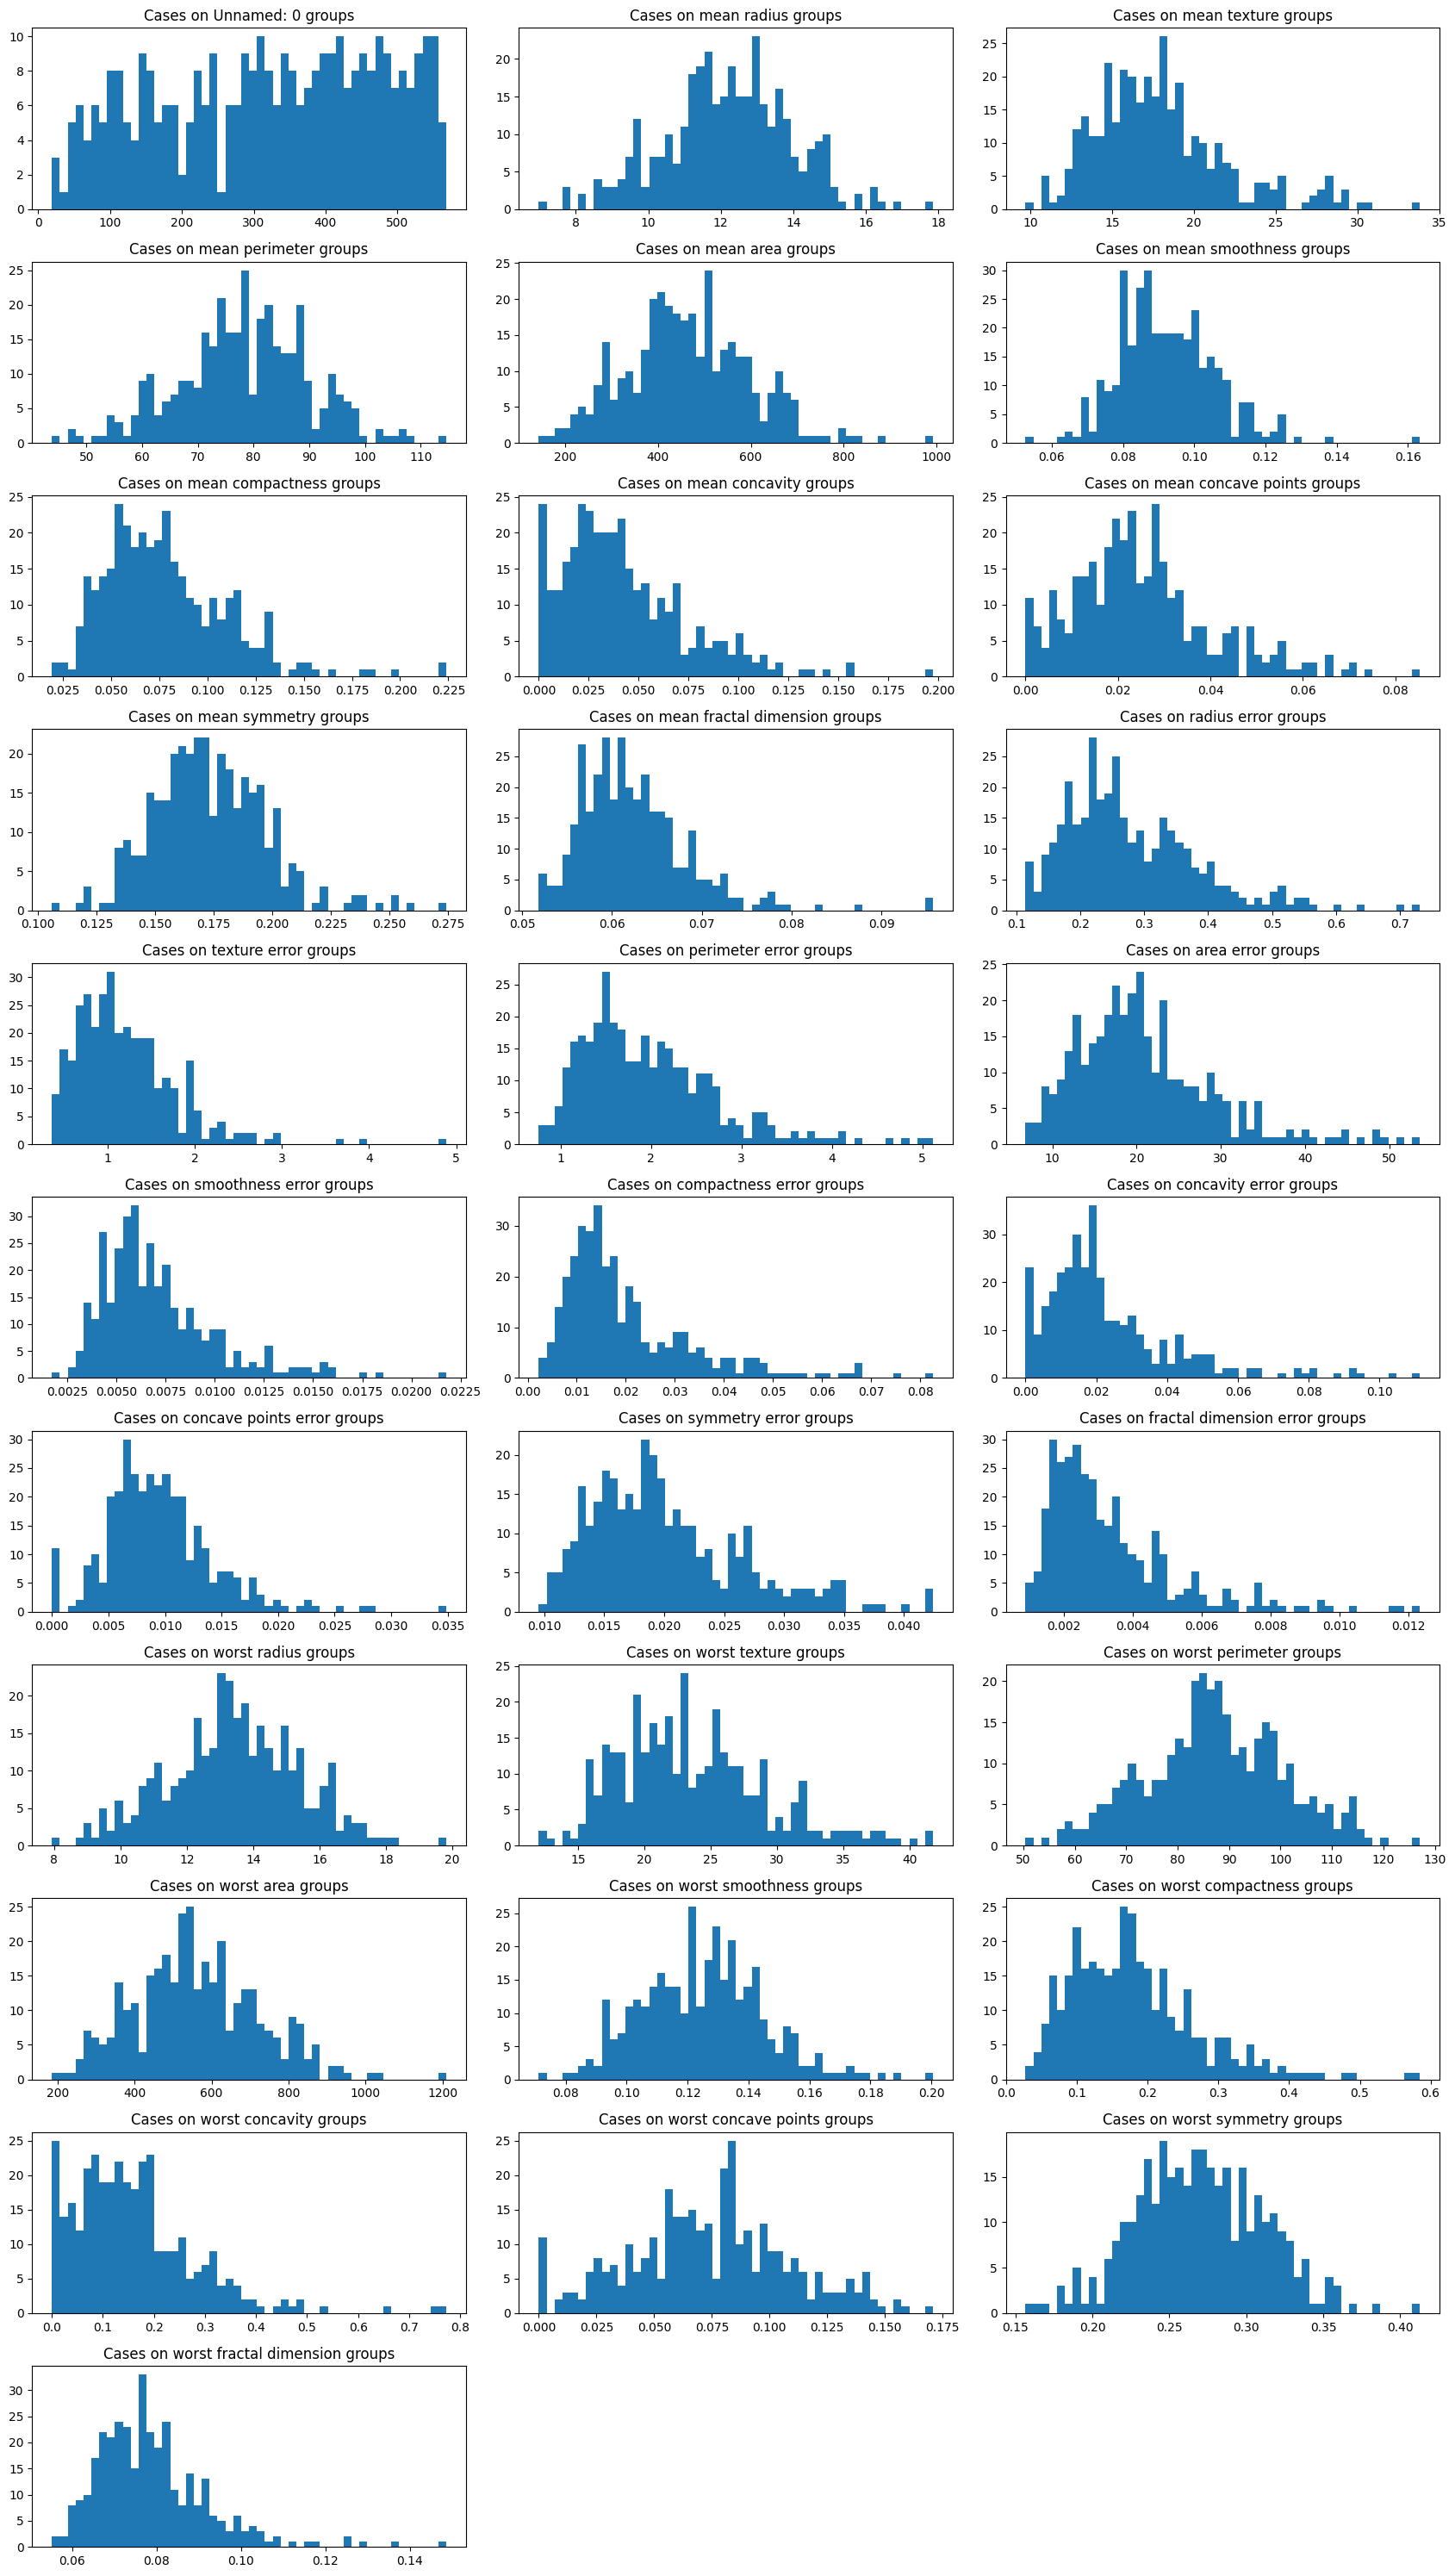

In [47]:
patients2 = df_cancer_clean[df_cancer_clean['target'] == 1]
plt.figure(figsize=(17,30))
count = 1
# Ploteo de un histograma para cada una de las características
for feature in top:
    plt.subplot(11, 3, count)
    plt.hist(patients2[feature], bins=50)
    plt.title(('Cases on ' +  feature + ' groups'))
    # plt.grid()
    count += 1

plt.tight_layout()
plt.show()

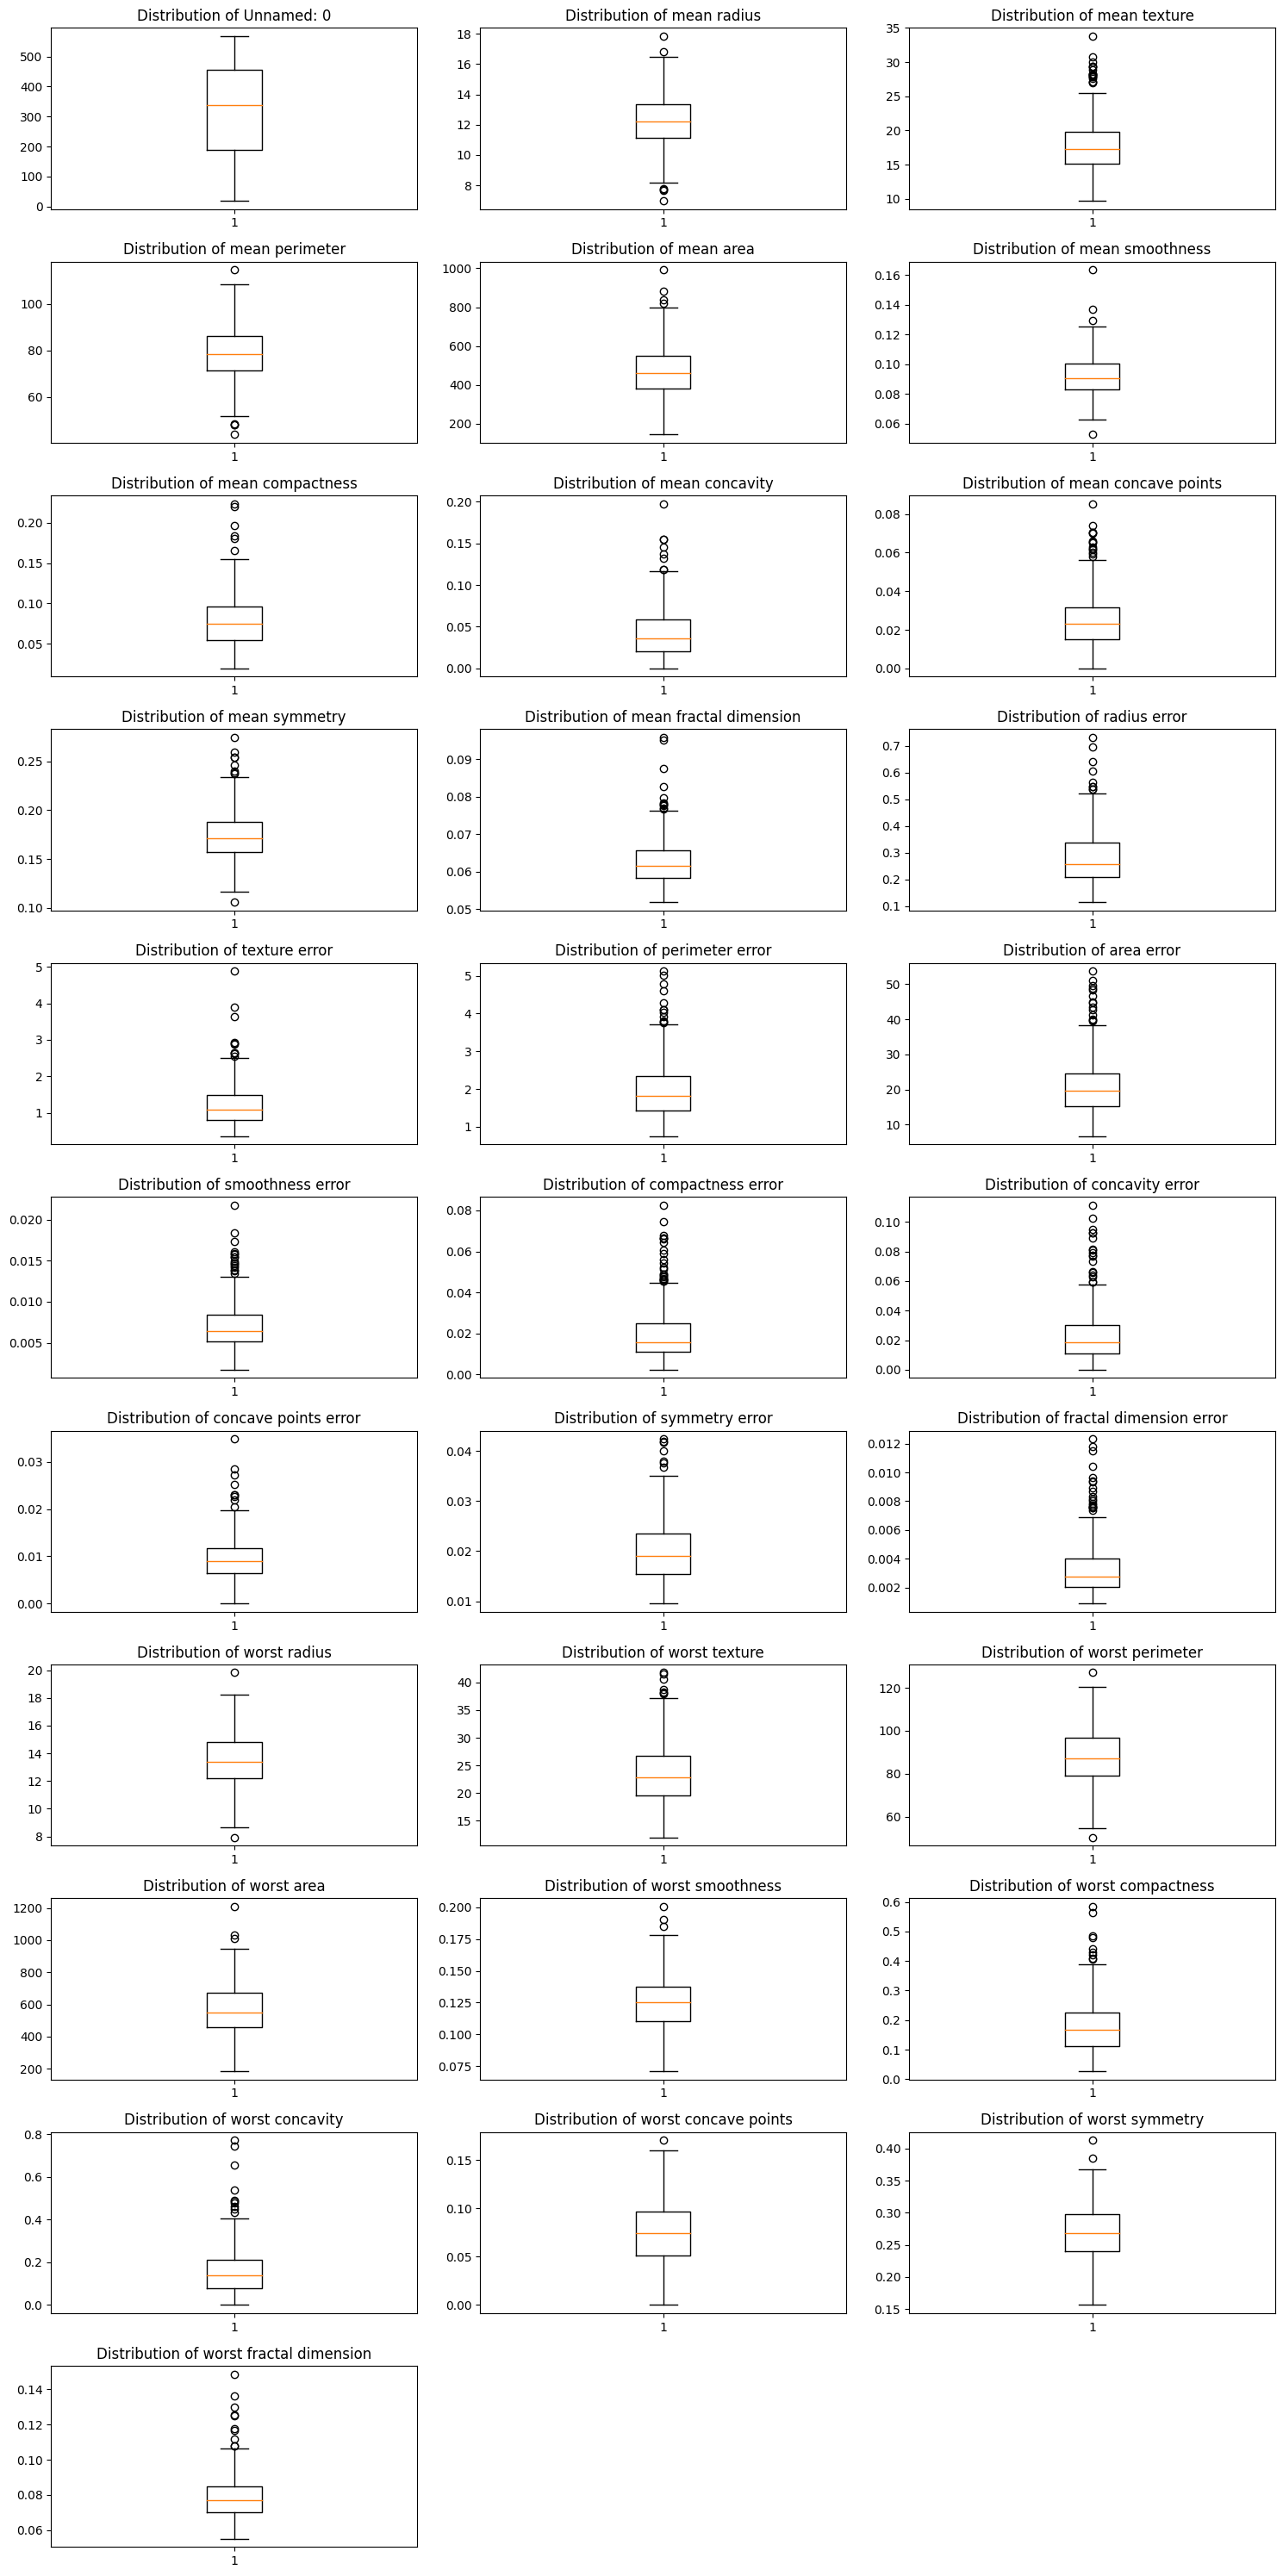

In [48]:
# Ploteo de gráfico de caja y bigotes para cada variable
plt.figure(figsize=(15,30))
count = 1
for feature in top:
    plt.subplot(11, 3, count)
    plt.boxplot(patients2[feature])
    plt.title(('Distribution of ' + feature))
    count += 1

plt.tight_layout()
plt.show()

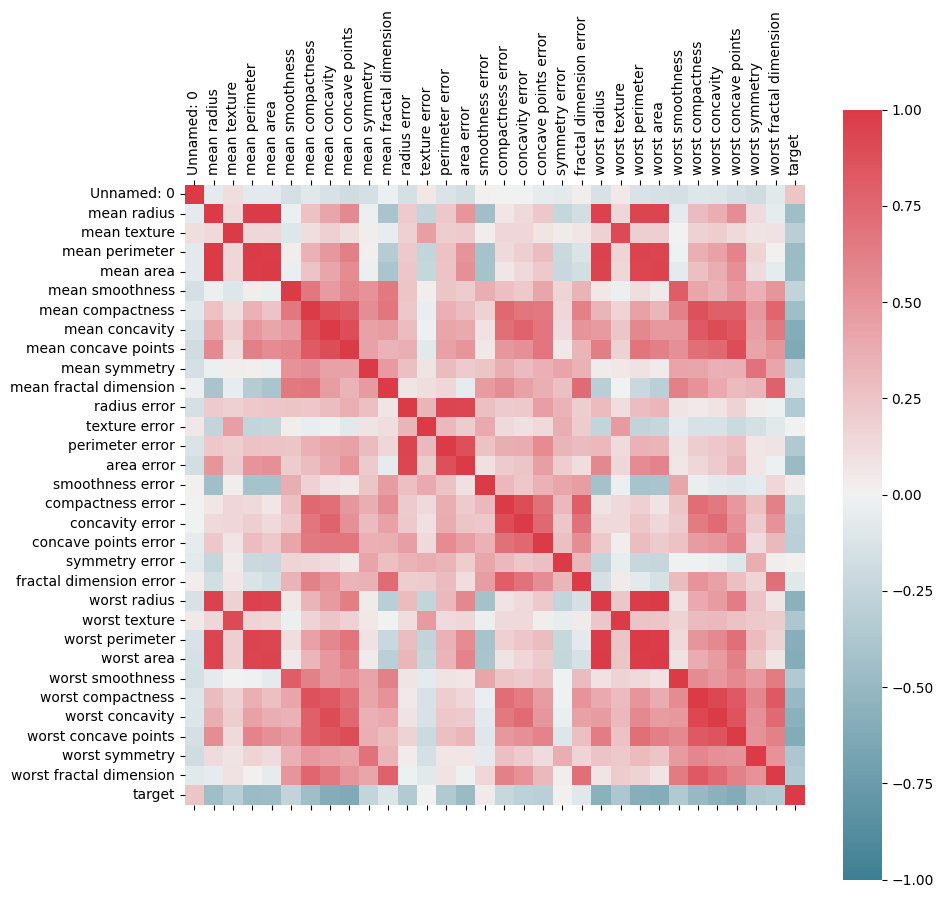

In [49]:
# Representación visual de cómo las variables se relacionan entre sí
corr = df_cancer_clean.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

# Procesamiento y Modelamiento

8) Propón un método predictivo para la data evaluada. Comenten sus resultados
**Hint: **Leer la documentación de la libreria lazypredict

In [50]:
!gdown https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy

!pip -q install lazypredict

Downloading...
From: https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy
To: /content/cancer_challenge_cl2.csv
100% 123k/123k [00:00<00:00, 2.56MB/s]


In [51]:
from sklearn.preprocessing import StandardScaler # Normalización de características.

scaler = StandardScaler()

X = df_cancer_clean.drop(['target'], axis=1)
y = df_cancer_clean['target']

data_normalized = scaler.fit_transform(X) # Cambio de escala

# Convertir el resultado a un nuevo dataframe
X = pd.DataFrame(data_normalized, columns=X.columns)

In [52]:
from sklearn.model_selection import train_test_split # Dividiendo los datos en conjuntos de entrenamiento y prueba.
from lazypredict.Supervised import LazyClassifier # Modelos de clasificación

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =123, test_size=0.2) # Dividiendo datos de prueba y entrenamiento
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

# L ista de modelos junto con las métricas de rendimiento estimadas.
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


 90%|████████▉ | 26/29 [00:04<00:00,  9.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3558
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 31
[LightGBM] [Info] Start training from score -1.595049
[LightGBM] [Info] Start training from score -0.230416
[LightGBM] [Info] Start training from score -5.843544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

100%|██████████| 29/29 [00:04<00:00,  5.91it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.93,0.96,0.96,0.94,0.06
ExtraTreesClassifier,0.97,0.95,0.95,0.97,0.59
SGDClassifier,0.97,0.93,0.93,0.97,0.08
LogisticRegression,0.97,0.93,0.93,0.97,0.12
SVC,0.95,0.92,0.92,0.95,0.04
NearestCentroid,0.86,0.92,0.96,0.90,0.08
RandomForestClassifier,0.94,0.91,0.91,0.94,0.52
DecisionTreeClassifier,0.87,0.90,0.90,0.89,0.08
LGBMClassifier,0.95,0.89,0.89,0.95,0.68


Como se puede apreciar el modelo de LogisticRegression tiene una presicion de 97% por lo que convierte a este en el mejor modelo, finalmente pese a tener otro modelo con el mismo nivel de presicion, otro factor importante fue el tiempo de respuesta.

# Bibliografía
Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.